In [1]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from datetime import datetime
import data_processing as dp
import geopandas as gpd


In [101]:
bike_weather_data = dp.bike_trip_read_and_connect_data(city_name = 'boston', start = datetime(2023, 1, 1), end = datetime(2023, 1, 31))
bike_weather_data = dp.bike_trip_feature_engineering(bike_weather_data)
pca_of_bike_weather_data = dp.apply_pca(bike_weather_data)

In [102]:
X = bike_weather_data
X_pca_5 = dp.apply_pca(X)
X_pca_9 = dp.apply_pca(X, n_components = 9)

In [103]:
iso_forest = IsolationForest(contamination=0.005, n_estimators=500, max_samples=0.6, max_features=0.9) 
bike_weather_data['anomaly'] = iso_forest.fit_predict(pca_of_bike_weather_data)

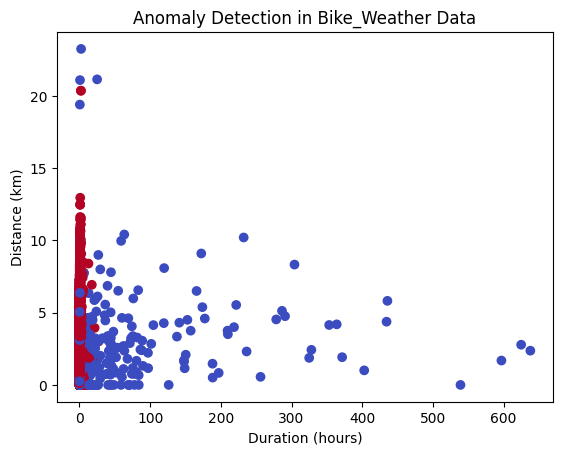

    tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
7           1693  0.000000                  0  0.000000  11.1  13.0   1.2   
8           1689  0.000000                  0  0.000000  11.1  13.0   1.2   
9           1615  0.000000                  0  0.000000  11.1  13.0   1.2   
32          8338  1.995237                  0  0.861460  11.1  11.2   0.3   
42         50966  2.357588                  0  0.166529  11.1  11.2   0.3   

    coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
7    7.0           0                6            1         0              6   
8    7.0           0                6            1         0              6   
9    7.0           0                6            1         0              6   
32   7.0           0                6            1         2              6   
42   7.0           0                6            1        14              6   

    end_month  anomaly  
7           1       -1  
8           

In [104]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

# plt.xlim(0, 50)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [105]:
anomalies.shape

(702, 15)

In [106]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

5.72934472934473
4.069214683682092


# Compare Normal data vs PCA with parameters used in unsupervised_fs

In [107]:
iso_forest = IsolationForest(n_estimators=100, max_samples=1024, contamination='auto') 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X)

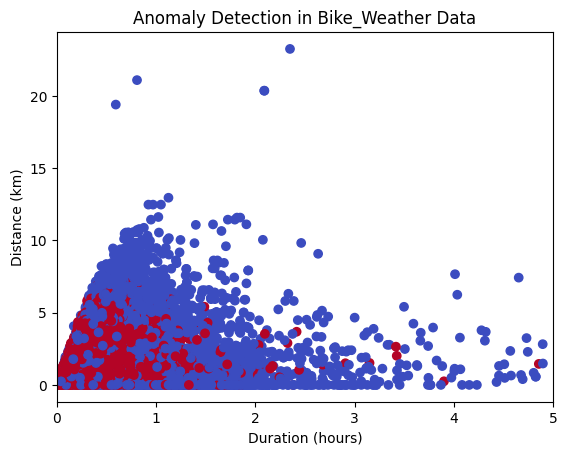

   tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
0           250  0.464383                  1  6.687112  11.1  13.0   1.2   
1           489  0.970031                  0  7.141336  11.1  13.0   1.2   
2           461  0.970031                  0  7.575083  11.1  13.0   1.2   
3          1065  0.585427                  0  1.978907  11.1  13.0   1.2   
4           601  1.136817                  1  6.809552  11.1  13.0   1.2   

   coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
0   7.0           0                6            1         0              6   
1   7.0           0                6            1         0              6   
2   7.0           0                6            1         0              6   
3   7.0           0                6            1         0              6   
4   7.0           0                6            1         0              6   

   end_month  anomaly  
0          1       -1  
1          1       -1  
2 

In [108]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

plt.xlim(0, 5)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [109]:
anomalies.shape

(18940, 15)

In [110]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

6.935110876451954
3.63169686985173


In [111]:
iso_forest = IsolationForest(n_estimators=100, max_samples=1024, contamination='auto') 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X_pca_5)

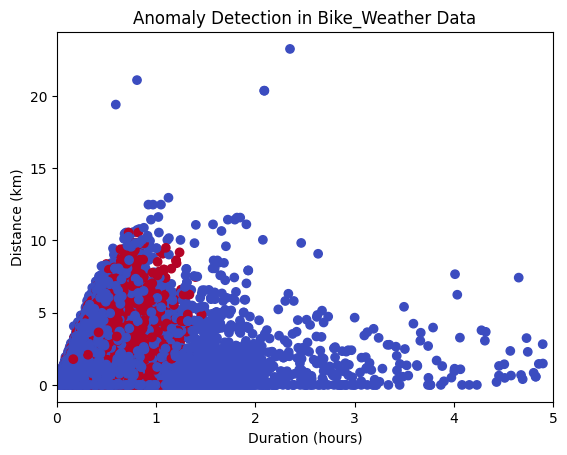

   tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
0           250  0.464383                  1  6.687112  11.1  13.0   1.2   
1           489  0.970031                  0  7.141336  11.1  13.0   1.2   
2           461  0.970031                  0  7.575083  11.1  13.0   1.2   
3          1065  0.585427                  0  1.978907  11.1  13.0   1.2   
4           601  1.136817                  1  6.809552  11.1  13.0   1.2   

   coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
0   7.0           0                6            1         0              6   
1   7.0           0                6            1         0              6   
2   7.0           0                6            1         0              6   
3   7.0           0                6            1         0              6   
4   7.0           0                6            1         0              6   

   end_month  anomaly  
0          1       -1  
1          1       -1  
2 

In [112]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

plt.xlim(0, 5)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [113]:
anomalies.shape

(10403, 15)

In [114]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

5.344323752763626
3.976096108113932


In [115]:
iso_forest = IsolationForest(n_estimators=100, max_samples=1024, contamination='auto') 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X_pca_9)

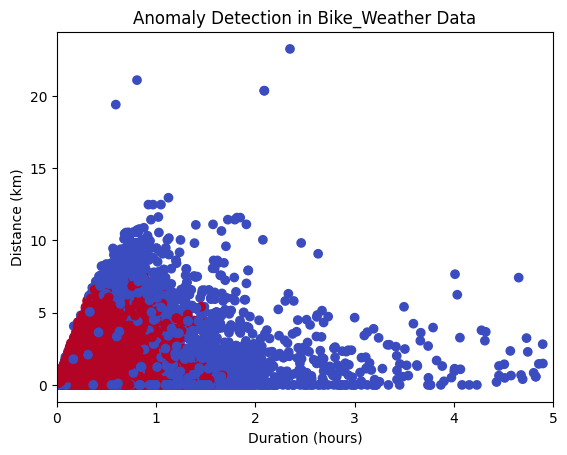

   tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
0           250  0.464383                  1  6.687112  11.1  13.0   1.2   
1           489  0.970031                  0  7.141336  11.1  13.0   1.2   
2           461  0.970031                  0  7.575083  11.1  13.0   1.2   
3          1065  0.585427                  0  1.978907  11.1  13.0   1.2   
4           601  1.136817                  1  6.809552  11.1  13.0   1.2   

   coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
0   7.0           0                6            1         0              6   
1   7.0           0                6            1         0              6   
2   7.0           0                6            1         0              6   
3   7.0           0                6            1         0              6   
4   7.0           0                6            1         0              6   

   end_month  anomaly  
0          1       -1  
1          1       -1  
2 

In [116]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

plt.xlim(0, 5)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [117]:
anomalies.shape

(6345, 15)

In [118]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

7.0962962962962965
3.9345721855293108


# Train IF with all features and visualize anomalies

In [2]:
bike_weather_data = dp.bike_trip_process_data_and_save(city_name = 'boston', start = datetime(2023, 1, 1), end = datetime(2023, 1, 31), pca=False)


Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326



In [3]:
bike_weather_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 140340 entries, 0 to 140339
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   tripduration                140340 non-null  int64   
 1   distance                    140340 non-null  float64 
 2   user_type_encoded           140340 non-null  int64   
 3   speed                       140340 non-null  float64 
 4   temp                        140340 non-null  float64 
 5   wspd                        140340 non-null  float64 
 6   prcp                        140340 non-null  float64 
 7   coco                        140340 non-null  float64 
 8   start_hour                  140340 non-null  int32   
 9   start_dayofweek             140340 non-null  int32   
 10  start_month                 140340 non-null  int32   
 11  end_hour                    140340 non-null  int32   
 12  end_dayofweek               140340 non-null  int32   
 

In [3]:
Y = bike_weather_data['special_day']
X = bike_weather_data.drop(columns=['special_day'])
X = X.drop(columns=['route', 'start_geometry', 'end_geometry', 'start station id', 'end station id'])

In [4]:
iso_forest = IsolationForest(contamination=0.03, n_estimators=500, max_samples=0.6, max_features=0.9) 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X)

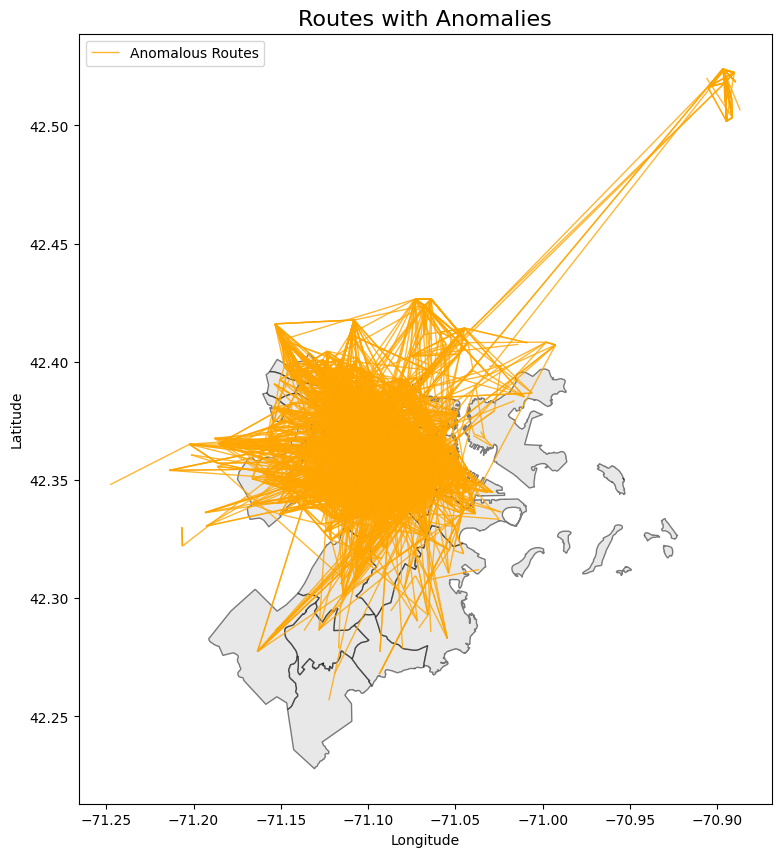

In [5]:
# Load neighborhoods data
neighborhoods = gpd.read_file('boston_cambridge_neighborhoods.geojson')

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot neighborhoods for context
neighborhoods.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)

# Define route categories, colors, and labels
route_areas = ['in_area', 'near_out_of_area', 'far_out_of_area']
colors = ['blue', 'green', 'red']
labels = ['Valid Neighborhood Routes', 'Near Out Of Area Routes', 'Far Out Of Area Routes']

# Plot each route area category
for category, color, label in zip(route_areas, colors, labels):
    # Filter routes by category
    filtered_routes = bike_weather_data[bike_weather_data['route_area'] == category]
    
    if not filtered_routes.empty:
        # Ensure geometry is explicitly set to the 'route' column
        filtered_routes = gpd.GeoDataFrame(filtered_routes, geometry='route', crs=neighborhoods.crs)
        
        # Plot the filtered routes (lines)
        filtered_routes.plot(ax=ax, color=color, linewidth=0.5, alpha=0.8, label=label)

# Add anomalies as a separate layer
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
if not anomalies.empty:
    anomalies = gpd.GeoDataFrame(anomalies, geometry='route', crs=neighborhoods.crs)
    anomalies.plot(ax=ax, color='orange', linewidth=1, alpha=0.8, label='Anomalous Routes')

# Add title, labels, and legend
plt.title('Routes with Anomalies', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left', fontsize=10)

# Show the plot
plt.show()


In [6]:
anomalies['route_area'].value_counts()

route_area
1    2247
2    1585
0     379
Name: count, dtype: int64

In [7]:
bike_weather_data['route_area'].value_counts()

route_area
1    117688
2     21966
0       686
Name: count, dtype: int64

In [8]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

7.6846354785086675
3.965936721785953


In [9]:
anomalies

,tripduration,distance,user_type_encoded,speed,temp,wspd,prcp,coco,start_hour,start_dayofweek,...,end_nearby_transit_stops,start_neighborhood,end_neighborhood,route_area,route,start_geometry,end_geometry,start station id,end station id,anomaly
0,250,0.464383,1,6.687112,11.1,13.0,1.2,7.0,0,6,...,1,2,2,1,"LINESTRING (-71.07739 42.34993, -71.08066 42.3...",POINT (-71.07739 42.34993),POINT (-71.08066 42.34652),36,21,-1
1,489,0.970031,0,7.141336,11.1,13.0,1.2,7.0,0,6,...,1,2,26,1,"LINESTRING (-71.07947 42.34959, -71.08337 42.3...",POINT (-71.07947 42.34959),POINT (-71.08337 42.34136),372,404,-1
2,461,0.970031,0,7.575083,11.1,13.0,1.2,7.0,0,6,...,1,2,26,1,"LINESTRING (-71.07947 42.34959, -71.08337 42.3...",POINT (-71.07947 42.34959),POINT (-71.08337 42.34136),372,404,-1
3,1065,0.585427,0,1.978907,11.1,13.0,1.2,7.0,0,6,...,1,4,11,1,"LINESTRING (-71.07287 42.35554, -71.06781 42.3...",POINT (-71.07287 42.35554),POINT (-71.06781 42.35183),58,345,-1
4,601,1.136817,1,6.809552,11.1,13.0,1.2,7.0,0,6,...,2,2,11,1,"LINESTRING (-71.07329 42.35114, -71.06167 42.3...",POINT (-71.07329 42.35114),POINT (-71.06167 42.35668),50,374,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140270,2951,6.370569,0,7.771619,4.4,0.0,0.0,3.0,22,1,...,1,37,0,2,"LINESTRING (-71.06547 42.39648, -71.12916 42.3...",POINT (-71.06547 42.39648),POINT (-71.12916 42.3638),390,149,-1
140331,1127,2.090115,0,6.676500,4.4,0.0,0.0,3.0,23,1,...,2,14,24,1,"LINESTRING (-71.09701 42.34871, -71.1055 42.36...",POINT (-71.09701 42.34871),POINT (-71.1055 42.36643),33,76,-1
140335,1512,3.637064,1,8.659676,4.4,0.0,0.0,3.0,23,1,...,1,14,37,2,"LINESTRING (-71.09701 42.34871, -71.10403 42.381)",POINT (-71.09701 42.34871),POINT (-71.10403 42.381),33,330,-1
140337,2174,3.353297,1,5.552837,4.4,0.0,0.0,3.0,23,1,...,1,13,37,2,"LINESTRING (-71.08287 42.36305, -71.11467 42.3...",POINT (-71.08287 42.36305),POINT (-71.11467 42.34415),583,452,-1


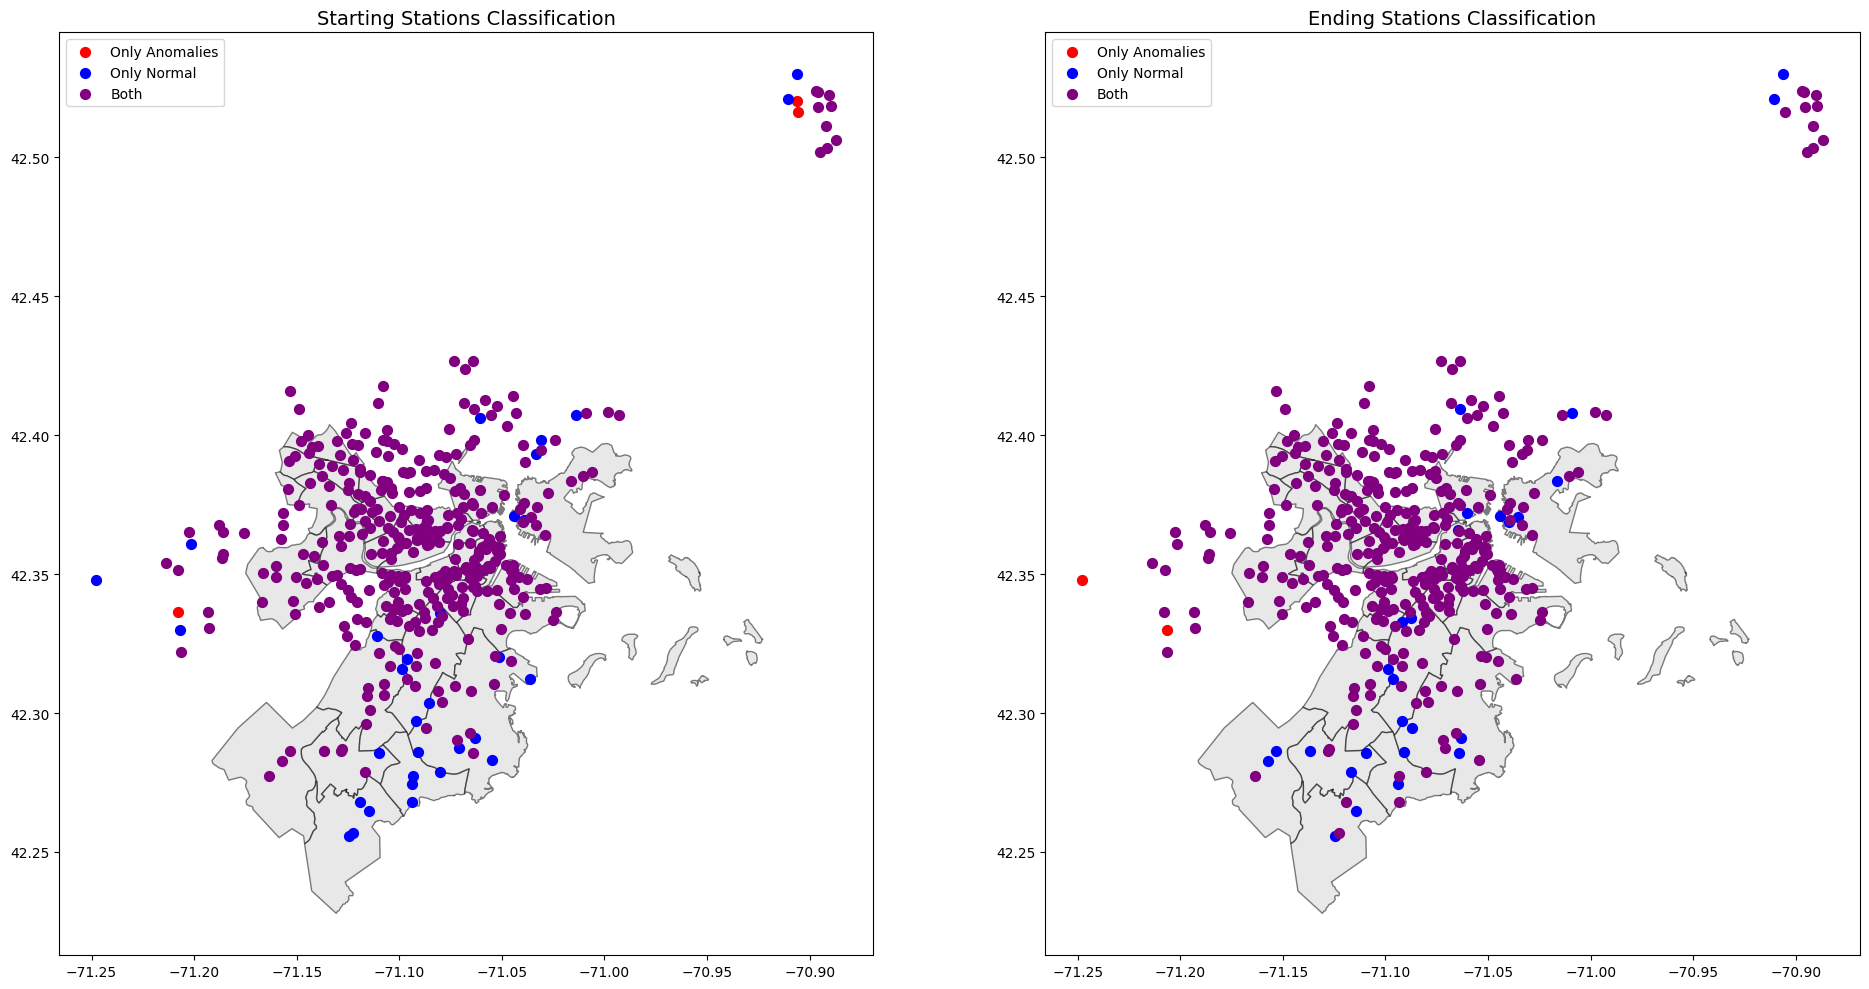

In [10]:
# Group data by stations to classify them
start_station_classification = bike_weather_data.groupby('start station id')['anomaly'].agg(
    lambda x: (
        'Both' if (-1 in x.values and 1 in x.values) else 
        'Only Anomalies' if -1 in x.values else 'Only Normal'
    )
).reset_index()

end_station_classification = bike_weather_data.groupby('end station id')['anomaly'].agg(
    lambda x: (
        'Both' if (-1 in x.values and 1 in x.values) else 
        'Only Anomalies' if -1 in x.values else 'Only Normal'
    )
).reset_index()

# Merge classifications with their respective geometries
start_station_geo = bike_weather_data[['start station id', 'start_geometry']].drop_duplicates()
end_station_geo = bike_weather_data[['end station id', 'end_geometry']].drop_duplicates()

start_station_classification = start_station_classification.merge(
    start_station_geo, left_on='start station id', right_on='start station id'
)

end_station_classification = end_station_classification.merge(
    end_station_geo, left_on='end station id', right_on='end station id'
)

# Assign color mapping
color_mapping = {'Only Anomalies': 'red', 'Only Normal': 'blue', 'Both': 'purple'}
start_station_classification['color'] = start_station_classification['anomaly'].map(color_mapping)
end_station_classification['color'] = end_station_classification['anomaly'].map(color_mapping)

# Create GeoDataFrames for starting and ending stations
start_gdf = gpd.GeoDataFrame(
    start_station_classification, geometry='start_geometry', crs=neighborhoods.crs
)
end_gdf = gpd.GeoDataFrame(
    end_station_classification, geometry='end_geometry', crs=neighborhoods.crs
)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot neighborhoods as background
neighborhoods.plot(ax=axes[0], color='lightgrey', edgecolor='black', alpha=0.5)
neighborhoods.plot(ax=axes[1], color='lightgrey', edgecolor='black', alpha=0.5)

# Plot starting stations
for category, color in color_mapping.items():
    start_gdf[start_gdf['anomaly'] == category].plot(
        ax=axes[0], color=color, markersize=50, label=category
    )

# Plot ending stations
for category, color in color_mapping.items():
    end_gdf[end_gdf['anomaly'] == category].plot(
        ax=axes[1], color=color, markersize=50, label=category
    )

# Titles and legends
axes[0].set_title('Starting Stations Classification', fontsize=14)
axes[0].legend(loc='upper left')

axes[1].set_title('Ending Stations Classification', fontsize=14)
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()
